### Music Recommender System

#### TASK: Generate personalised music recommendations rather than popular music recommendations.


##### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("kaggle_visible_evaluation_triplets.txt",sep='\t',names=['user_id','song_id','freq'])

In [3]:
data

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [4]:
data1=pd.read_csv("kaggle_songs.txt",sep='\t',names=['song_id'])
data1

,song_id
0,SOAAADD12AB018A9DD 1
1,SOAAADE12A6D4F80CC 2
2,SOAAADF12A8C13DF62 3
3,SOAAADZ12A8C1334FB 4
4,SOAAAFI12A6D4F9C66 5
...,...
386208,SOZZZRJ12AB0187A75 386209
386209,SOZZZRV12A8C1361F1 386210
386210,SOZZZSR12AB01854CD 386211
386211,SOZZZWD12A6D4F6624 386212


In [5]:
data2=pd.read_csv("kaggle_users.txt",sep='\t',names=['user_id'])
data2

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8
...,...
109995,07f2f354a2a4390624e0d04e4a555ef67e98f673
109996,fe752b1aa2a12dbc203c37b70881d88481c655f1
109997,ab79461415bb9db956def3a897886d0754ddddfb
109998,fc072bde2043756ea30ff07e4a5311e34825b4df


In [6]:
data3=pd.read_csv("taste_profile_song_to_tracks.txt",sep="\t",names=['song_id','track_id','track_id2'])
data3.head()

,song_id,track_id,track_id2
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A,NaN
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615,NaN
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7,NaN
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532,NaN
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17,NaN


In [7]:
data4=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist','title'])
data4.head()

,track_id,song_id,artist,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


### Here we have loaded 5 txt files into 5 dataframes
* data=kaggle_visible_evaluation_triplets.txt
* data1=kaggle_songs.txt
* data2=kaggle_users.txt
* data3=taste_profile_song_to_tracks.txt
* data4=unique_tracks.txt


In [8]:
data.shape

(1450933, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [10]:
data.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


## Checking Miising values and duplicates in the data

In [11]:
data.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data_merged=pd.merge(data,data4)
data_merged

,user_id,song_id,freq,track_id,artist,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
...,...,...,...,...,...,...
1491947,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,TRZHWHD128F42B9D11,Our Broken Garden,The Blinding
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,TRNBQWA128F145DB74,Emilio,Como A Nadie
1491949,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,TRIWGAI12903CDF710,Morbid Angel,Victorious March Of Reign The Conqueror
1491950,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,TRMPODL128F4228DE1,Gus Gus,Call of the Wild


### here we are dropping track id because both song id and track id are same

In [14]:
data_merged=data_merged.drop('track_id',axis=1)
data_merged.head()

,user_id,song_id,freq,artist,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One


In [15]:
data_merged.shape

(1491952, 5)

In [16]:
print('Total data points in our data:',data_merged.shape[0])
print('Total artists in our data:'    ,data_merged['artist'].nunique())
print('Total titles in our data:'     ,data_merged['title'].nunique())
print('Total user_id in our data:'    ,data_merged['user_id'].nunique())
print('Total songs in our data:'      ,data_merged['song_id'].nunique())

Total data points in our data: 1491952
Total artists in our data: 28367
Total titles in our data: 137674
Total user_id in our data: 110000
Total songs in our data: 163206


In [17]:
print('Number of unique Release: ',data_merged['title'].unique().shape[0])
print('Number of unique artists: ',data_merged['artist'].unique().shape[0])

Number of unique Release:  137675
Number of unique artists:  28367


### Distribution of Frequency

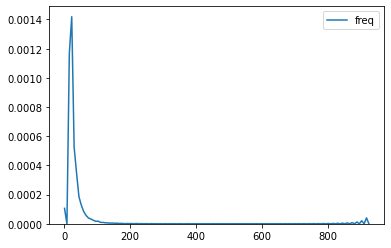

In [18]:
sns.kdeplot(data_merged['freq'])

In [19]:
print(data_merged["freq"].max())
print(data_merged["freq"].min())

923
1


### Number of Unique Songs Listened per User 

In [20]:
unique_songs_per_user=data_merged.groupby(['user_id'])['freq'].count()
unique_songs_per_user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                            ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    13
Name: freq, Length: 110000, dtype: int64

In [21]:
unique_songs_per_user.sort_values()

user_id
b4f681dac463c297568bffe7f4b646b74a5e6d0d     5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d     5
d1764e1f4626164793d400b95efb4a5f80a06cf9     5
d1776bb80cf8298288974c52f903cc3b9601761a     5
98d00906e235bede8d2b14b9cf5b802ee2438231     5
                                            ..
016a24e91a72c159a5048ab1b9b2ba5ce761b526    54
3233c598c50f0ddbd351504e773cd51de79691db    55
d30e18323f15426c3cdc8585252ed34459916f51    55
ad4b2717e89766b66b96fe52a38736116e315874    57
316110734d8da7478cc33237458814f770a9eb7a    57
Name: freq, Length: 110000, dtype: int64

In [22]:
print(unique_songs_per_user.min())
print(unique_songs_per_user.max())

5
57


#### from above ,users listening songs minimum and maximum no of songs listened by them

In [23]:
unique_songs_per_user.describe()

count    110000.000000
mean         13.563200
std           8.321648
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: freq, dtype: float64

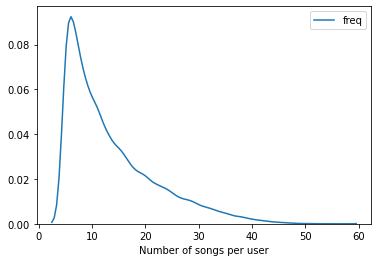

In [24]:
plt.xlabel("Number of songs per user")
sns.kdeplot(unique_songs_per_user)
plt.show()

### Analysis of Popular artist

In [25]:
##sns.barplot(data_merged['artist'])

In [36]:
popular_artists=data_merged[['artist','song_id']].groupby('artist')['song_id'].count().sort_values(ascending=False)

In [38]:
popular_artists.sort_values().tail(25)

artist
Black Eyed Peas              4299
The All-American Rejects     4464
Kanye West                   4508
Rihanna                      4625
Metallica                    5011
Harmonia                     5046
Guns N' Roses                5061
BjÃ¶rk                       5144
Evanescence                  5170
Daft Punk                    5411
John Mayer                   5452
The Killers                  5721
Radiohead                    5764
Linkin Park                  5846
OneRepublic                  6027
The Black Keys               6507
Train                        6617
Taylor Swift                 7435
Jack Johnson                 7465
Muse                         7916
Eminem                       8160
Florence + The Machine       8213
Justin Bieber                9259
Kings Of Leon               11586
Coldplay                    13675
Name: song_id, dtype: int64

### Artist Coldplay songs list

In [80]:
coldplay=data_merged[data_merged['artist']=='Coldplay']

In [102]:
list1=coldplay['title'].values

In [103]:
coldplay=[]
for i in list1:
    if i not in coldplay:
        coldplay.append(i)

In [104]:
coldplay

['Yellow',
 'The Scientist',
 'Fix You',
 "Don't Panic",
 'Sparks',
 'Clocks',
 'Life In Technicolor ii',
 'Such A Rush',
 'Fix You (Live)',
 'Speed Of Sound',
 'Lost!',
 'God Put A Smile Upon Your Face',
 'Brothers & Sisters',
 'A Rush Of Blood To The Head',
 'Clocks (Live In Sydney)',
 'One I Love',
 'For You',
 'You Only Live Twice (Live From Norway)',
 'Shiver',
 'Swallowed In The Sea',
 'In My Place',
 'Postcards From Far Away',
 'Glass Of Water',
 "Things I Don't Understand",
 'Strawberry Swing',
 '42',
 'Til Kingdom Come',
 'The Goldrush',
 'X & Y',
 'Life In Technicolor',
 'We Never Change',
 'Bigger Stronger',
 'What If',
 'Trouble',
 "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
 'Only Superstition',
 'Politik',
 'Careful Where You Stand',
 'Warning Sign',
 'See You Soon',
 'Spies',
 'Cemeteries Of London',
 'A Whisper',
 'A Message',
 'Square One',
 'Low',
 'I Bloom Blaum',
 'I Ran Away',
 'The World Turned Upside Down',
 'Talk (Junkie XL Remix)',
 'H

#### Justin Bieber Songs List

In [109]:
justin=data_merged[data_merged['artist']=='Justin Bieber']
justin

,user_id,song_id,freq,artist,title
152044,1a4f6f87887a663457e6ab881d41e648423de4da,SODGVGW12AC9075A8D,1,Justin Bieber,Somebody To Love
152045,1a4f6f87887a663457e6ab881d41e648423de4da,SODGVGW12AC9075A8D,1,Justin Bieber,Somebody To Love
152046,e326c4b9fe3659ec1dc3af53fd7e0893809dafbc,SODGVGW12AC9075A8D,2,Justin Bieber,Somebody To Love
152047,e326c4b9fe3659ec1dc3af53fd7e0893809dafbc,SODGVGW12AC9075A8D,2,Justin Bieber,Somebody To Love
152048,8ccb2ab980036f4503872ef9d74708d21d097563,SODGVGW12AC9075A8D,1,Justin Bieber,Somebody To Love
...,...,...,...,...,...
508983,878f15ed5937a070e5896d970ef6261a2196440b,SODTHOY12AC9071AE7,1,Justin Bieber,Runaway Love
508984,897dc18740ce7791fc83b6046e508871a10fbb5c,SODTHOY12AC9071AE7,2,Justin Bieber,Runaway Love
508985,9262299dc007ca6f39219fb5cb028524f7ef44d8,SODTHOY12AC9071AE7,1,Justin Bieber,Runaway Love
508986,a70b08d81094a440cce6a45e00c1423ad6bd9a56,SODTHOY12AC9071AE7,1,Justin Bieber,Runaway Love


In [110]:
list1=justin['title'].values
list1

array(['Somebody To Love', 'Somebody To Love', 'Somebody To Love', ...,
       'Runaway Love', 'Runaway Love', 'Runaway Love'], dtype=object)

In [111]:
justin=[]
for i in list1:
    if i not in justin:
        justin.append(i)

In [112]:
justin

['Somebody To Love',
 'Down To Earth',
 'One Time',
 'U Smile',
 'Favorite Girl',
 'Love Me',
 'Common Denominator',
 'Never Let You Go',
 'Stuck In The Moment',
 'Up',
 'One Less Lonely Girl',
 'That Should Be Me',
 'Bigger',
 'Runaway Love']

### Analysis of popularity of songs

In [145]:
popular_song=data_merged[['title','freq']].groupby('title')['freq'].count().sort_values(ascending=False)


In [150]:
a=popular_song.to_frame()

In [147]:
popular_song.sort_values().tail(25)

title
Ain't Misbehavin                                                       1712
Canada                                                                 1731
Don't Stop The Music                                                   1766
ReprÃ©sente                                                            1769
SinceritÃ© Et Jalousie                                                 1797
Marry Me                                                               2013
Bring Me To Life                                                       2046
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   2097
Drop The World                                                         2226
OMG                                                                    2260
Nothin' On You [feat. Bruno Mars] (Album Version)                      2346
Yellow                                                                 2631
Love Story                                                             2633
Tive S

In [158]:
data_merged

,user_id,song_id,freq,artist,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One
...,...,...,...,...,...
1491947,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1491949,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1491950,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


                                             |                                             | [  0%]   00:00 ->…


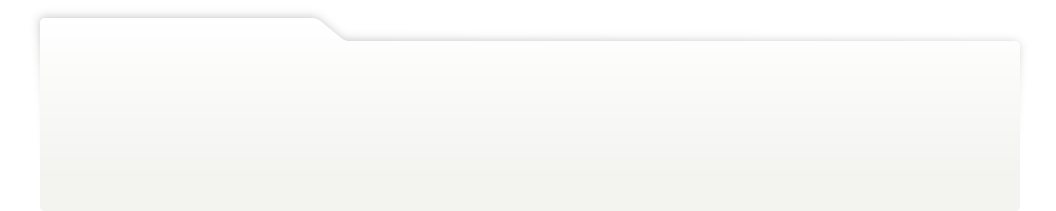
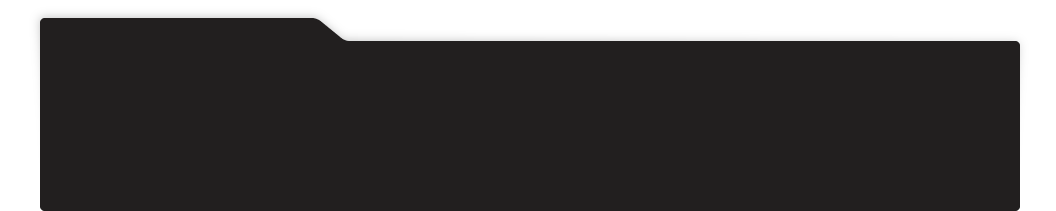
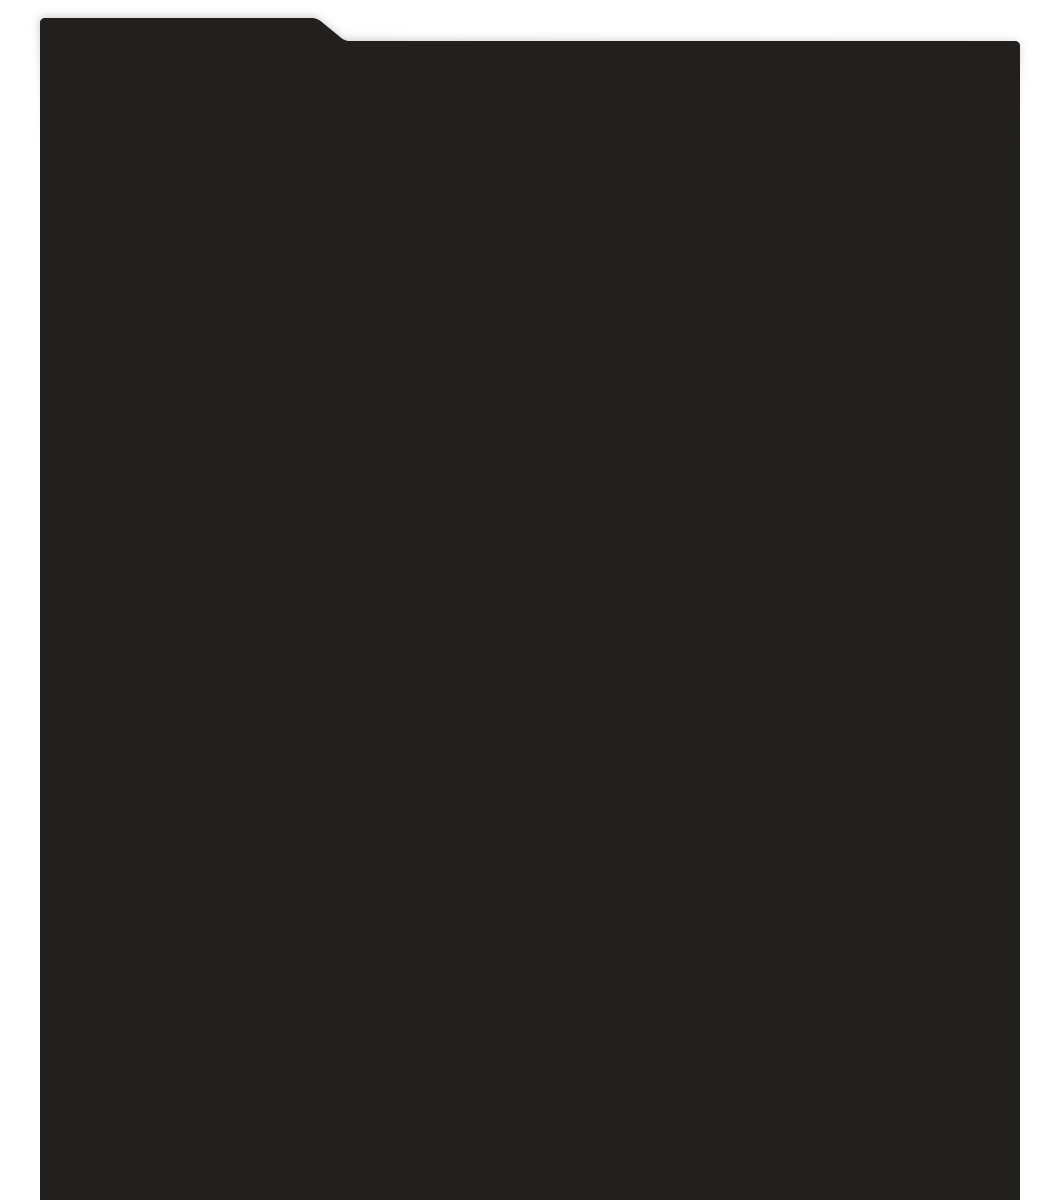
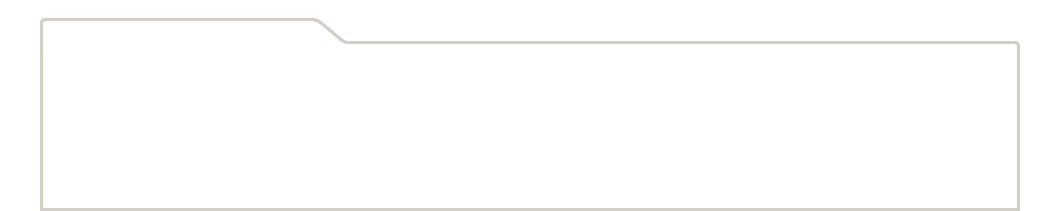
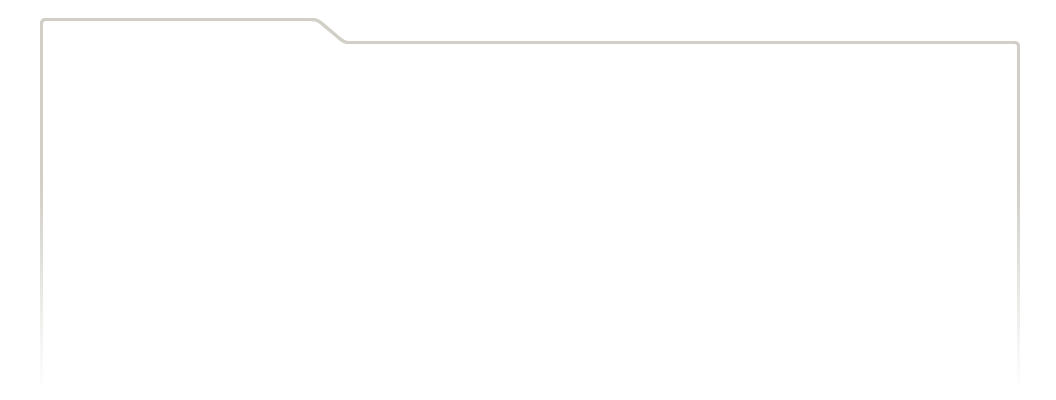
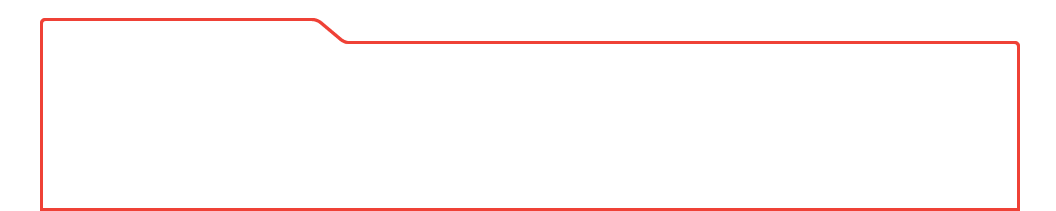
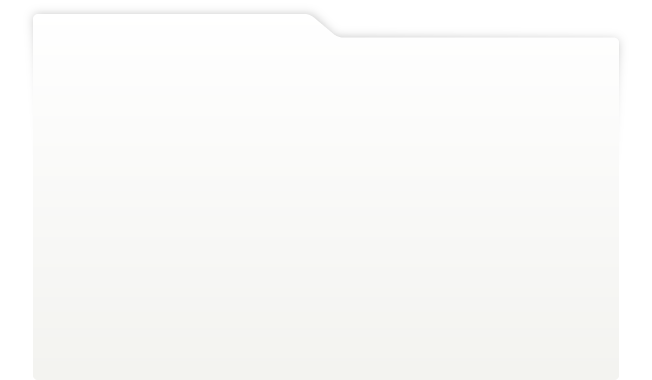
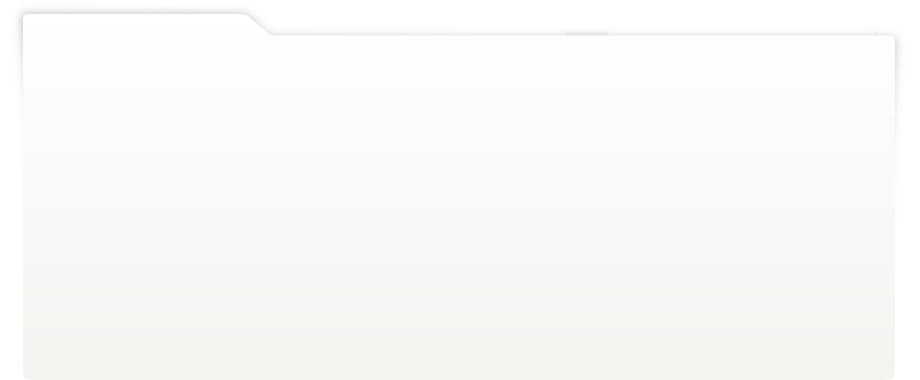
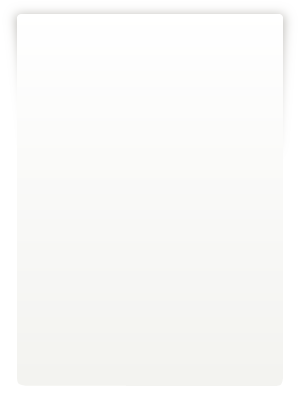
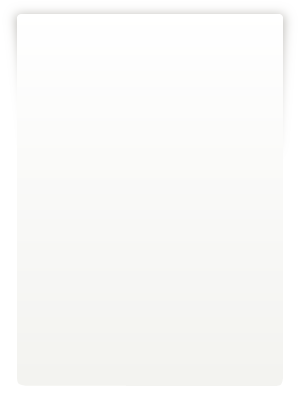
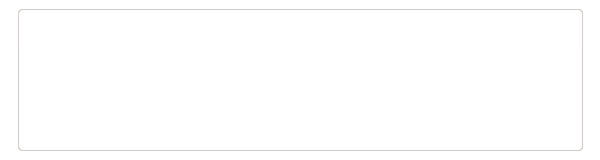
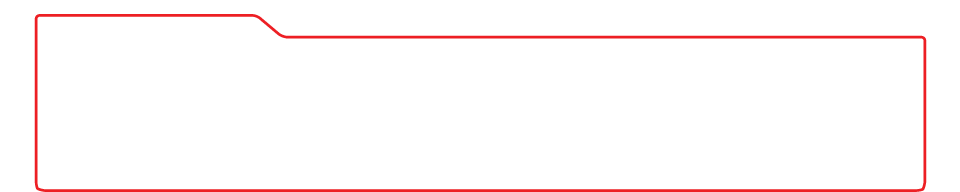
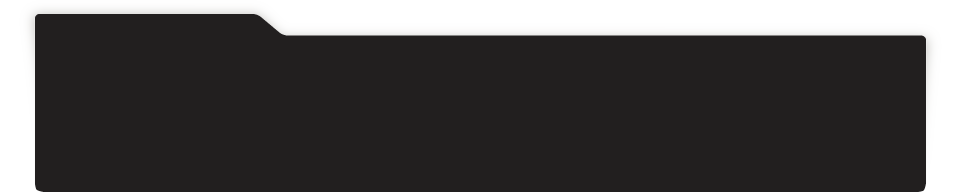
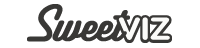
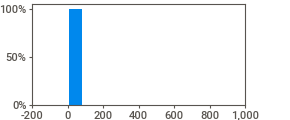
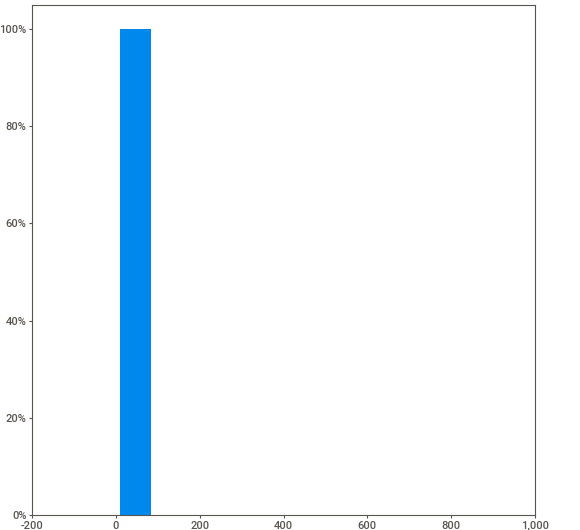
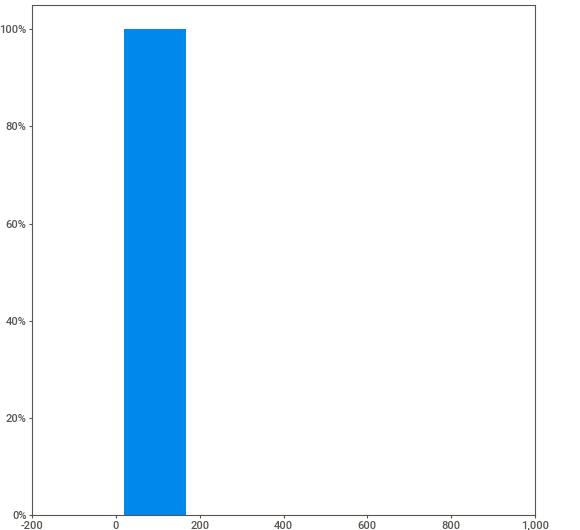
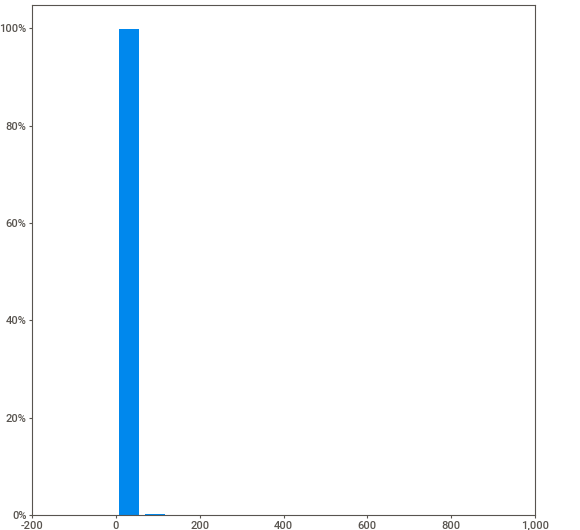
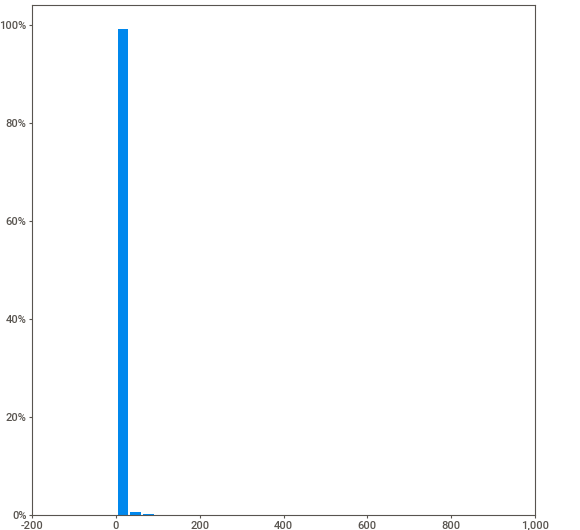
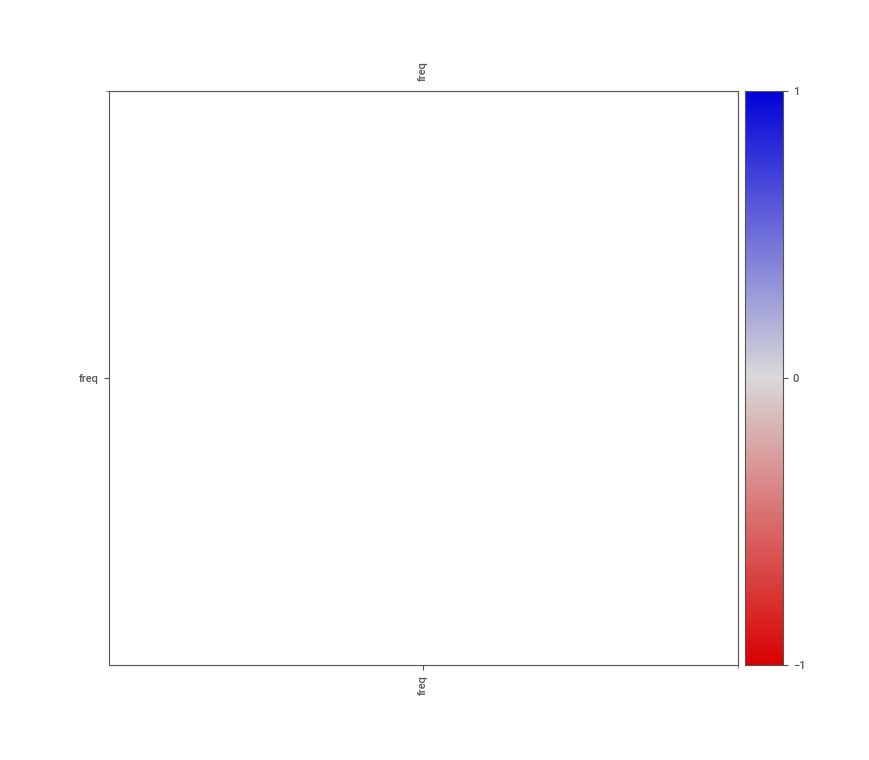
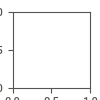

In [161]:
import sweetviz as sv
report = sv.analyze(data_merged)
report.show_notebook()